<a href="https://colab.research.google.com/github/KozinIS/CV/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%92%D1%8B%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9_%D0%B2_%D0%BF%D0%BE%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B8_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8F%22_(AE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Подгрузка библиотек

In [ ]:
import numpy as np                # Для работы с массивами
import pandas as pd               # Для работы с базой данных
import random                     # Для формирования рандомных значений
import matplotlib.pyplot as plt   # Для визуализации графиков

from sklearn.model_selection import train_test_split    # Для формирования обучающей выборки

from tensorflow.keras.models import Model, Sequential # Подгружаем абстрактный класс базовой модели сети от кераса и последовательную модель
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Input, Conv2DTranspose, Conv1DTranspose, concatenate, Activation, MaxPooling2D, MaxPooling1D, Conv2D, Conv1D, BatchNormalization, SpatialDropout1D, LSTM   # Подгружаем слои (с некоторым избытком на всякий случай)

# 2 Генерация базы данных

In [ ]:
# Генерация массива для будущей базы данных:
Array_for_Base = np.random.randint(0,1, (100000,8))
Array_for_Base.shape

(100000, 8)

In [ ]:
# Создание датафрейма (будущая база данных, пока просто заполненная нолями):
Сolumns = ['User ID', 'Access Time', 'Disconnect Time', 'Duration of Session', 'Access Point', 'Data Set', 'Operations', 'Anomalous']
Base = pd.DataFrame(Array_for_Base, columns = Сolumns)
Base.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


Подготовка массивов с данными для будущей интеграции в базу данных

In [ ]:
# Массив со сведеняими об идентификаторах пользователей (100 000 записей):
i = 0                     # Переменная для счётчика
Users_List = [0]          # Будущий список значений идентификатора пользователя
while i <= 99999:         # Запускаем счётчик для генерации 100 000 значений
    N = np.random.randint(1, 51)              # Переменная идентификатора (от 1 до 50)
    if N > 9:
      S = ['user-' + str(N) + '@domain']         # Одно сгенерированное значение идентификатора
    else:
      S = ['user-0' + str(N) + '@domain']        # Одно сгенерированное значение идентификатора (для красоты добавляем перед сгенерированным одноразрядным номером "0")
    Users_List = np.vstack([Users_List, S])   # Добавляем одно сгенерированное значение идентификатора в массив
    i +=1                                     # Переключаем счётчик на +1
Users =  np.delete(Users_List, 0, axis = 0)   # Удаление первой строчки с нулевым значением

# Массив со сведеняими о времени осуществления доступа пользователя к ресурсу (100 000 записей):
Access_Time_List = [0]    # Будущий список значений времени доступа
i = 0                     # Переменная для счётчика
while i <= 99999:         # Запускаем счётчик для генерации 100 000 значений
    z_m = np.random.randint(1, 13)                  # Переменная "месяц" (от 1 до 12)

    if z_m == 1 or 3 or 5 or 7 or 8 or 10 or 12:        # выделяем месяцы, в которых есть 31 день и:
        z_d = np.random.randint(1, 32)                    # генерируем значение от 1 до 31
    elif z_m == 4 or 6 or 9 or 11:                      # выделяем месяцы, в которых есть только 30 дней и:
        z_d = np.random.randint(1, 31)                    # генерируем значение от 1 до 30
    elif z_m == 2:                                      # выделяем февраль и:
        z_d = np.random.randint(1, 29)                    # генерируем значение от 1 до 28

    r = np.random.randint(1,101)                    # Создаём генератор случайных значений (100 вариантов с нормальным распределением)
    if 1 <= r <= 96:                                # Условие для временного диапазона 06:00 - 18:00 (вероятность выпадения - 96%):
        z_h = np.random.randint(6, 18)                  # переменная "часы" (от 6 до 18)
    elif 96 < r < 99:                               # Условие для временного диапазона 01:00 - 05:00 (вероятность выпадения - 2%):
        z_h = np.random.randint(1, 5)                   # переменная "часы" (от 1 до 5)
    else:                                           # Условие для временного диапазона 19:00 - 23:00 (вероятность выпадения - 2%):
        z_h = np.random.randint(1, 23)                  # переменная "часы" (от 19 до 23)
    z_min = np.random.randint(1, 60)                # Переменная "минуты" (от 1 до 59)
    z_sec = np.random.randint(1, 60)                # Переменная "секунды" (от 1 до 59)

    j = [str(z_d) + ',' + str(z_m) + ',' + str(2022) + ',' + str(z_h) + ',' + str(z_min) + ',' + str(z_sec)]  # Одно сгенерированное значение даты
    Access_Time_List = np.vstack([Access_Time_List, j])   # Добавляем одно сгенерированное значение даты в массив
    i +=1                                                 # Переключаем счётчик на +1
Access_Time =  np.delete(Access_Time_List, 0, axis = 0)   # Удаление первой строчки с нулевым значением

# Массив со сведеняими об устройстве, с которого был осуществлён доступ (100 000 записей):
Access_Point_List = ['WS-001@domain.local', 'WS-002@domain.local', 'MWS-001@domain.local', 'MWS-002@domain.local', 'HWS-001@domain.local', 'HWS-002@domain.local', 'RWS-001@domain.local', 'RWS-002@domain.local']    # Список возможных устройств
Access_Point = np.random.choice(Access_Point_List, size=100000)   # Случайным образом привязываем к каждой строке одно устройство

# Массив со сведеняими о сетевом ресурсе, к которому подключался пользователь (100 000 записей):
Data_Set_List =  ['Folder-01', 'Folder-02', 'Folder-03', 'Folder-04', 'Folder-05', 'Folder-06', 'Folder-07', 'Folder-08', 'Folder-09', 'Folder-10']   # Список возможных сетевых ресурсов
Data_Set = np.random.choice(Data_Set_List, size=100000)   # Случайным образом привязываем к каждой строке один сетевой ресурс

# Массив со сведеняими о совершённых пользователем действиях (100 000 записей):
Operations_List =   ['read', 'write', 'modification', 'remove']   # Список возможных действия пользователя
Operations = np.random.choice(Operations_List, size=100000)       # Случайным образом привязываем к каждой строке одно действие

Подстановка сгенерированных масивов (100000,1) в созданную базу данных

In [ ]:
Base['User ID'] = Users
Base['Access Time'] = Access_Time
Base['Access Point'] = Access_Point
Base['Data Set'] = Data_Set
Base['Operations'] = Operations

Base.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
0,user-02@domain,"5,5,2022,9,47,5",0,0,MWS-002@domain.local,Folder-09,modification,0
1,user-23@domain,"13,12,2022,16,30,51",0,0,WS-002@domain.local,Folder-06,remove,0
2,user-02@domain,"17,2,2022,14,11,14",0,0,MWS-001@domain.local,Folder-06,read,0
3,user-31@domain,"17,12,2022,12,52,17",0,0,MWS-002@domain.local,Folder-02,modification,0
4,user-50@domain,"25,7,2022,9,27,54",0,0,MWS-002@domain.local,Folder-05,remove,0


Перевод значений времени начала сессии в DateTimeIndex

In [ ]:
Base['Access Time'] = pd.to_datetime(Base['Access Time'], format="%d,%m,%Y,%H,%M,%S", errors='coerce')  # Перевод в DateTimeIndex
Base.sort_values(by='Access Time', inplace=True)  # Отсортируем все события в хронологическом порядке

Base.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,user-02@domain,2022-01-01 01:22:20,0,0,WS-001@domain.local,Folder-04,write,0
17965,user-31@domain,2022-01-01 01:59:31,0,0,MWS-001@domain.local,Folder-06,write,0
69235,user-39@domain,2022-01-01 02:20:41,0,0,MWS-001@domain.local,Folder-06,write,0
60126,user-12@domain,2022-01-01 02:45:30,0,0,HWS-001@domain.local,Folder-10,remove,0
84395,user-10@domain,2022-01-01 03:02:59,0,0,RWS-001@domain.local,Folder-10,modification,0


Генерация сведений о продолжительности сессии

In [ ]:
Duration_of_Session = pd.Series([pd.Timedelta(seconds=0)])  # Создаём массив будущих значений продолжительности сессии (продолжительность подключения к сети)
for i in range(100000):
    r = np.random.randint(1,201)                   # Создаём генератор случайных значений (200 вариантов с нормальным распределением)
    if r < 199:                                    # Если генератор выдаёт значение, меньшее 199 (вероятность 99%), то:
        x = np.random.randint(1, 60*60*13)           # генерируется количество секунд, не превышающее 13 полных часов - [13:00:00]
    elif r == 199:                                 # Если генератор выдаёт значение, равное 199 (вероятность 0,5%), то:
        x = np.random.randint(60*60*13 + 1, 60*60*24)  # генерируется количество секунд, из диапазона [13:00:01 - 24:00:00]
    else:                                          # Если генератор выдаёт значение, равное 200 (вероятность 0,5%), то:
        x = np.random.randint(60*60*24 + 1, 60*60*48)  # генерируется количество секунд, из диапазона [24:00:01 - 48:00:00]
    DoS = pd.Series([pd.Timedelta(seconds=x)])     # Сгенерированная продолжительность одного сеанса
    Duration_of_Session = np.vstack([Duration_of_Session, DoS])  # Добавляем сгенерированные сведения о продолжительности одного сеанса в общий массив
Duration_of_Session =  np.delete(Duration_of_Session, 0, axis = 0)   # Удаление первой строчки с нулевым значением
Duration_of_Session.shape                          # Проверка размерности получившегося массива. Должен быть (100000,1)

(100000, 1)

In [ ]:
Base['Duration of Session'] = Duration_of_Session                               # Вставляем в базу данных сведения о продолжительности сессии
Base['Disconnect Time'] = Base['Access Time'] + Base['Duration of Session']     # Вычисляем в базе данных время окончания сессии
Base.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,user-02@domain,2022-01-01 01:22:20,2022-01-01 03:06:19,0 days 01:43:59,WS-001@domain.local,Folder-04,write,0
17965,user-31@domain,2022-01-01 01:59:31,2022-01-01 04:45:42,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,0
69235,user-39@domain,2022-01-01 02:20:41,2022-01-01 11:14:49,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,0
60126,user-12@domain,2022-01-01 02:45:30,2022-01-01 06:43:54,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,0
84395,user-10@domain,2022-01-01 03:02:59,2022-01-01 04:03:19,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,0


Формирование вывода об аномальности поведения

In [ ]:
Base.loc[(Base['Duration of Session'] <= pd.Timedelta('0 days 13:00:00')), ('Anomalous')] = 'Normal'    # Если продолжительность сеанса не превышает 13 часов => событие не аномально
Base.loc[(Base['Duration of Session'] > pd.Timedelta('0 days 13:00:00')), ('Anomalous')] = 'Abnormal'   # Если продолжительность сеанса превышает 13 часов => событие аномально

Base.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,user-02@domain,2022-01-01 01:22:20,2022-01-01 03:06:19,0 days 01:43:59,WS-001@domain.local,Folder-04,write,Normal
17965,user-31@domain,2022-01-01 01:59:31,2022-01-01 04:45:42,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,Normal
69235,user-39@domain,2022-01-01 02:20:41,2022-01-01 11:14:49,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,Normal
60126,user-12@domain,2022-01-01 02:45:30,2022-01-01 06:43:54,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,Normal
84395,user-10@domain,2022-01-01 03:02:59,2022-01-01 04:03:19,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,Normal


In [ ]:
mask = (Base['Anomalous'] == 'Abnormal')    # Создаём маску для подсчёта количетсва аномальных событий (ожидается ~1%)
print('Количество записей об аномальном поведении :', Base[mask].shape)
print('Процент зарегистрированных аномальных событий :', Base[mask].size / 1000 / 8, '%')
print('---------------------------------------------')
mask_2 = (Base['Anomalous'] == 'Normal')    # Создаём маску для подсчёта количетсва не аномальных событий (ожидается ~99%)
print('Количество записей о нормальном поведении :', Base[mask_2].shape)
print('Процент зарегистрированных нормальных событий :', Base[mask_2].size / 1000 / 8, '%')

Количество записей об аномальном поведении : (999, 8)
Процент зарегистрированных аномальных событий : 0.999 %
---------------------------------------------
Количество записей о нормальном поведении : (99001, 8)
Процент зарегистрированных нормальных событий : 99.001 %


# 3 Парсинг базы данных

## 3.1 Общие положения

In [ ]:
# Создание копии базы данных (для удобства в ходе выполнения дипломной работы):
Base_Parsed = Base.copy()
Base_Parsed.head()

,User ID,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,user-02@domain,2022-01-01 01:22:20,2022-01-01 03:06:19,0 days 01:43:59,WS-001@domain.local,Folder-04,write,Normal
17965,user-31@domain,2022-01-01 01:59:31,2022-01-01 04:45:42,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,Normal
69235,user-39@domain,2022-01-01 02:20:41,2022-01-01 11:14:49,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,Normal
60126,user-12@domain,2022-01-01 02:45:30,2022-01-01 06:43:54,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,Normal
84395,user-10@domain,2022-01-01 03:02:59,2022-01-01 04:03:19,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,Normal


In [ ]:
Base_Parsed.dtypes

User ID                         object
Access Time             datetime64[ns]
Disconnect Time         datetime64[ns]
Duration of Session    timedelta64[ns]
Access Point                    object
Data Set                        object
Operations                      object
Anomalous                       object
dtype: object

## 3.2 User ID

In [ ]:
# Удаление столбца со сведениями об идентификаторе пользователя:
Base_Parsed.drop(['User ID'], axis = 1, inplace = True)
Base_Parsed.head()

,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,2022-01-01 01:22:20,2022-01-01 03:06:19,0 days 01:43:59,WS-001@domain.local,Folder-04,write,Normal
17965,2022-01-01 01:59:31,2022-01-01 04:45:42,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,Normal
69235,2022-01-01 02:20:41,2022-01-01 11:14:49,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,Normal
60126,2022-01-01 02:45:30,2022-01-01 06:43:54,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,Normal
84395,2022-01-01 03:02:59,2022-01-01 04:03:19,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,Normal


## 3.3 Access Time

In [ ]:
Access_Time_Fuzzy_Set = {'Время осуществления доступа': ['00:00 – 04:59', '05:00 – 05:59', '06:00 – 07:59', '08:00 – 12:59', '13:00 – 13:59', '14:00 – 17:59', '18:00 – 18:59', '19:00 – 22:59', '23:00 – 23:59'],
        'Значение функции принадлежности': [0.9, 0.8, 0.5, 0.0, 0.1, 0.0, 0.5, 0.7, 0.8],
        'Представление в формате OneHotEncoding' : [[0,1,0,0,0,0], [0,0,1,0,0,0], [0,0,0,0,1,0], [1,0,0,0,0,0], [0,0,0,0,0,1], [0,0,0,0,0,0], [0,0,0,0,1,0], [0,0,0,1,0,0], [0,0,1,0,0,0]]}

Access_Time_Fuzzy_Set = pd.DataFrame(Access_Time_Fuzzy_Set)
print('Таблица 1 - Соответствие значений времнеи осуществления доступа, функции принадлежности множеству значений аномального поведения и бинарного представления')
Access_Time_Fuzzy_Set

Таблица 1 - Соответствие значений времнеи осуществления доступа, функции принадлежности множеству значений аномального поведения и бинарного представления


,Время осуществления доступа,Значение функции принадлежности,Представление в формате OneHotEncoding
0,00:00 – 04:59,0.9,"[0, 1, 0, 0, 0, 0]"
1,05:00 – 05:59,0.8,"[0, 0, 1, 0, 0, 0]"
2,06:00 – 07:59,0.5,"[0, 0, 0, 0, 1, 0]"
3,08:00 – 12:59,0.0,"[1, 0, 0, 0, 0, 0]"
4,13:00 – 13:59,0.1,"[0, 0, 0, 0, 0, 1]"
5,14:00 – 17:59,0.0,"[0, 0, 0, 0, 0, 0]"
6,18:00 – 18:59,0.5,"[0, 0, 0, 0, 1, 0]"
7,19:00 – 22:59,0.7,"[0, 0, 0, 1, 0, 0]"
8,23:00 – 23:59,0.8,"[0, 0, 1, 0, 0, 0]"


In [ ]:
# Вводим значения функций принадлежности множеству значаний аномального поведения:
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour <= 4), ('Temp')] = 0.9
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 5), ('Temp')] = 0.8
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 6), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 7), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 8), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 9), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 10), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 11), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 12), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 13), ('Temp')] = 0.1
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 14), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 15), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 16), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 17), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 18), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 19), ('Temp')] = 0.7
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 20), ('Temp')] = 0.7
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 21), ('Temp')] = 0.7
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 22), ('Temp')] = 0.7
Base_Parsed.loc[(Base_Parsed['Access Time'].dt.hour == 23), ('Temp')] = 0.8

Base_Parsed['Access Time'] = Base_Parsed['Temp']      # Применяем значения функций принадлежности из врЕменного столбеца
Base_Parsed.drop(['Temp'], axis = 1, inplace = True)  # Удаляем временный сотлбец

Base_Parsed.head()

,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,0.9,2022-01-01 03:06:19,0 days 01:43:59,WS-001@domain.local,Folder-04,write,Normal
17965,0.9,2022-01-01 04:45:42,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,Normal
69235,0.9,2022-01-01 11:14:49,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,Normal
60126,0.9,2022-01-01 06:43:54,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,Normal
84395,0.9,2022-01-01 04:03:19,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,Normal


## 3.4 Disconnect Time

In [ ]:
Disconnect_Time_Fuzzy_Set = {'Время прекращения доступа': ['00:00 – 04:59', '05:00 – 05:59', '06:00 – 07:59', '08:00 – 12:59', '13:00 – 13:59', '14:00 – 16:59', '17:00 – 17:59', '18:00 – 18:59', '19:00 – 22:59', '23:00 – 23:59'],
        'Значение функции принадлежности': [0.9, 0.8, 0.6, 0.5, 0.1, 0.5, 0.0, 0.1, 0.5, 0.7],
        'Представление в формате OneHotEncoding' : [[0,0,0,0,0,0,1], [0,0,0,0,0,1,0], [0,0,0,1,0,0,0], [0,0,1,0,0,0,0], [0,1,0,0,0,0,0], [1,0,0,0,0,0,0], [0,0,1,0,0,0,0], [0,1,0,0,0,0,0], [0,0,1,0,0,0,0], [0,0,0,0,1,0,0]]}

Disconnect_Time_Fuzzy_Set = pd.DataFrame(Disconnect_Time_Fuzzy_Set)
print('Таблица 2 - Соответствие значений времнеи прекращения доступа, функции принадлежности множеству значений аномального поведения и бинарного представления')
Disconnect_Time_Fuzzy_Set

Таблица 2 - Соответствие значений времнеи прекращения доступа, функции принадлежности множеству значений аномального поведения и бинарного представления


,Время прекращения доступа,Значение функции принадлежности,Представление в формате OneHotEncoding
0,00:00 – 04:59,0.9,"[0, 0, 0, 0, 0, 0, 1]"
1,05:00 – 05:59,0.8,"[0, 0, 0, 0, 0, 1, 0]"
2,06:00 – 07:59,0.6,"[0, 0, 0, 1, 0, 0, 0]"
3,08:00 – 12:59,0.5,"[0, 0, 1, 0, 0, 0, 0]"
4,13:00 – 13:59,0.1,"[0, 1, 0, 0, 0, 0, 0]"
5,14:00 – 16:59,0.5,"[1, 0, 0, 0, 0, 0, 0]"
6,17:00 – 17:59,0.0,"[0, 0, 1, 0, 0, 0, 0]"
7,18:00 – 18:59,0.1,"[0, 1, 0, 0, 0, 0, 0]"
8,19:00 – 22:59,0.5,"[0, 0, 1, 0, 0, 0, 0]"
9,23:00 – 23:59,0.7,"[0, 0, 0, 0, 1, 0, 0]"


In [ ]:
# Вводим значения функций принадлежности множеству значаний аномального поведения:
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour <= 4), ('Temp')] = 0.9
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 5), ('Temp')] = 0.8
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 6), ('Temp')] = 0.6
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 7), ('Temp')] = 0.6
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 8), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 9), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 10), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 11), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 12), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 13), ('Temp')] = 0.1
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 14), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 15), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 16), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 17), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 18), ('Temp')] = 0.1
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 19), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 20), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 21), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 22), ('Temp')] = 0.5
Base_Parsed.loc[(Base_Parsed['Disconnect Time'].dt.hour == 23), ('Temp')] = 0.7

Base_Parsed['Disconnect Time'] = Base_Parsed['Temp']    # Применяем значения функций принадлежности из врЕменного столбеца
Base_Parsed.drop(['Temp'], axis = 1, inplace = True)    # Удаляем временный столбец

Base_Parsed.head()

,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,0.9,0.9,0 days 01:43:59,WS-001@domain.local,Folder-04,write,Normal
17965,0.9,0.9,0 days 02:46:11,MWS-001@domain.local,Folder-06,write,Normal
69235,0.9,0.5,0 days 08:54:08,MWS-001@domain.local,Folder-06,write,Normal
60126,0.9,0.6,0 days 03:58:24,HWS-001@domain.local,Folder-10,remove,Normal
84395,0.9,0.9,0 days 01:00:20,RWS-001@domain.local,Folder-10,modification,Normal


## 3.5 Duration of Session

In [ ]:
Duration_of_Session_Fuzzy_Set = {'Продолжительность сессии': ['≤ 01:59', '02:00 – 06:59', '07:00 – 07:59', '08:00 – 09:59', '10:00 – 12:59', '13:00 – 23:59', '≥ 24:00'],
        'Значение функции принадлежности': [0.4, 0.3, 0.1, 0.0, 0.3, 0.8, 0.9],
        'Представление в формате OneHotEncoding' : [[0,0,0,1,0,0,0], [0,0,0,0,1,0,0], [0,0,0,0,0,1,0], [1,0,0,0,0,0,0], [0,0,0,0,1,0,0], [0,0,1,0,0,0,0], [0,1,0,0,0,0,0]]}

Duration_of_Session_Fuzzy_Set = pd.DataFrame(Duration_of_Session_Fuzzy_Set)
print('Таблица 3 - Соответствие значений продолжительности сессии, функции принадлежности множеству значений аномального поведения и бинарного представления')
Duration_of_Session_Fuzzy_Set

Таблица 3 - Соответствие значений продолжительности сессии, функции принадлежности множеству значений аномального поведения и бинарного представления


,Продолжительность сессии,Значение функции принадлежности,Представление в формате OneHotEncoding
0,≤ 01:59,0.4,"[0, 0, 0, 1, 0, 0, 0]"
1,02:00 – 06:59,0.3,"[0, 0, 0, 0, 1, 0, 0]"
2,07:00 – 07:59,0.1,"[0, 0, 0, 0, 0, 1, 0]"
3,08:00 – 09:59,0.0,"[1, 0, 0, 0, 0, 0, 0]"
4,10:00 – 12:59,0.3,"[0, 0, 0, 0, 1, 0, 0]"
5,13:00 – 23:59,0.8,"[0, 0, 1, 0, 0, 0, 0]"
6,≥ 24:00,0.9,"[0, 1, 0, 0, 0, 0, 0]"


In [ ]:
# Вводим значения функций принадлежности множеству значаний аномального поведения:
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 00:00:00')), ('Temp')] = 0.4
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 02:00:00')), ('Temp')] = 0.3
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 07:00:00')), ('Temp')] = 0.1
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 08:00:00')), ('Temp')] = 0.0
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 10:00:00')), ('Temp')] = 0.3
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('0 days 13:00:00')), ('Temp')] = 0.8
Base_Parsed.loc[(Base_Parsed['Duration of Session'] >= pd.Timedelta('1 days 00:00:00')), ('Temp')] = 0.9

Base_Parsed['Duration of Session'] = Base_Parsed['Temp']  # Применяем значения функций принадлежности из врЕменного столбеца
Base_Parsed.drop(['Temp'], axis = 1, inplace = True)      # Удаляем врЕменный столбец

Base_Parsed.head()

,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,0.9,0.9,0.4,WS-001@domain.local,Folder-04,write,Normal
17965,0.9,0.9,0.3,MWS-001@domain.local,Folder-06,write,Normal
69235,0.9,0.5,0.0,MWS-001@domain.local,Folder-06,write,Normal
60126,0.9,0.6,0.3,HWS-001@domain.local,Folder-10,remove,Normal
84395,0.9,0.9,0.4,RWS-001@domain.local,Folder-10,modification,Normal


# 4 Формирование обучающей выборки (параметризация данных)

## 4.1 Формирование булевых векторов методом OneHotEncodding

In [ ]:
Base_Parsed.head()

,Access Time,Disconnect Time,Duration of Session,Access Point,Data Set,Operations,Anomalous
87423,0.9,0.9,0.4,WS-001@domain.local,Folder-04,write,Normal
17965,0.9,0.9,0.3,MWS-001@domain.local,Folder-06,write,Normal
69235,0.9,0.5,0.0,MWS-001@domain.local,Folder-06,write,Normal
60126,0.9,0.6,0.3,HWS-001@domain.local,Folder-10,remove,Normal
84395,0.9,0.9,0.4,RWS-001@domain.local,Folder-10,modification,Normal


In [ ]:
# Данные о времени осуществления доступа (подключения):
def getParameter_AccessTime(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0, 0, 0]
  if (0.0 in arg):  out[0]=1
  if (0.1 in arg):  out[1]=1
  if (0.5 in arg):  out[2]=1
  if (0.7 in arg):  out[3]=1
  if (0.8 in arg):  out[4]=1
  if (0.9 in arg):  out[5]=1
  return out

# Данные о времени прекращения доступа доступа (подключения):
def getParameter_DisconnectTime(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0, 0, 0, 0]
  if (0.0 in arg):  out[0]=1
  if (0.1 in arg):  out[1]=1
  if (0.5 in arg):  out[2]=1
  if (0.6 in arg):  out[3]=1
  if (0.7 in arg):  out[4]=1
  if (0.8 in arg):  out[5]=1
  if (0.9 in arg):  out[6]=1
  return out

# Данные о продолжительности работ:
def getParameter_DurationOfSession(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0, 0, 0]
  if (0.0 in arg):  out[0]=1
  if (0.1 in arg):  out[1]=1
  if (0.3 in arg):  out[2]=1
  if (0.4 in arg):  out[3]=1
  if (0.8 in arg):  out[4]=1
  if (0.9 in arg):  out[5]=1
  return out

# Данные о точке доступа:
def getParameter_AccessPoint(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0]
  if ('WS-001@domain.local' in arg):   out[0]=1
  if ('WS-002@domain.local' in arg):   out[0]=1
  if ('MWS-001@domain.local' in arg):  out[1]=1
  if ('MWS-002@domain.local' in arg):  out[1]=1
  if ('HWS-001@domain.local' in arg):  out[2]=1
  if ('HWS-002@domain.local' in arg):  out[2]=1
  if ('RWS-001@domain.local' in arg):  out[3]=1
  if ('RWS-002@domain.local' in arg):  out[3]=1
  return out

# Данные о ресурсах, с которыми осуществлялись действия:
def getParameter_DataSet(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  if ('Folder-01' in arg):   out[0]=1
  if ('Folder-02' in arg):   out[1]=1
  if ('Folder-03' in arg):   out[2]=1
  if ('Folder-04' in arg):   out[3]=1
  if ('Folder-05' in arg):   out[4]=1
  if ('Folder-06' in arg):   out[5]=1
  if ('Folder-07' in arg):   out[6]=1
  if ('Folder-08' in arg):   out[7]=1
  if ('Folder-09' in arg):   out[8]=1
  if ('Folder-10' in arg):   out[9]=1
  return out

# Данные о совершаемых действиях:
def getParameter_Operations(arg):   # Создаём функцию для параметризации
  out= [0, 0, 0, 0]
  if ('read' in arg):         out[0]=1
  if ('write' in arg):        out[1]=1
  if ('modification' in arg): out[2]=1
  if ('remove' in arg):       out[3]=1
  return out

def getParameter_Anomalous(arg):   # Создаём функцию для параметризации
  out= [0]
  if ('Normal' in arg):   out[0]=0
  if ('Abnormal' in arg): out[0]=1
  return out

# Извлекаем все параметры:
def getAllParameters(val):   # Создаём функцию для сведения всех параметров в единый вектор
  AccessTime = getParameter_AccessTime(val)
  DisconnectTime = getParameter_DisconnectTime(val)
  DurationOfSession = getParameter_DurationOfSession(val)
  AccessPoint = getParameter_AccessPoint(val)
  DataSet = getParameter_DataSet(val)
  Operation = getParameter_Operations(val)
  Anomalous = getParameter_Anomalous(val)

  out = []
  out += AccessTime
  out += DisconnectTime
  out += DurationOfSession
  out += AccessPoint
  out += DataSet
  out += Operation
  out += Anomalous

  return out

In [ ]:
def getData(values):  # Создаём функцию для формирования обучающей выборки
  pre_xTrain = []
  for val in values:
    x = getAllParameters(val)
    pre_xTrain.append(x)      # Список для создания болванки будущей обучающей выборки

  pre_xTrain = np.array(pre_xTrain) # Переводим список в формат массива
  return (pre_xTrain)

In [ ]:
(Pre_Train_Base) = getData(Base_Parsed.values) # Извлекаем значения из отпаршенной базы данных в болванку будущей обучающей выборки

In [ ]:
print('Размерность болванки для будущей обучающей выборки: ', Pre_Train_Base.shape)

n = 0
print('Пример одного булева вектора из будущей обучающей выборки: ', Pre_Train_Base[n])

Размерность болванки для будущей обучающей выборки:  (100000, 38)
Пример одного булева вектора из будущей обучающей выборки:  [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0]


## 4.2 Формирование двух баз данных - с нормальным и аномальным поведением

In [ ]:
normal = Pre_Train_Base[Pre_Train_Base[:,37] == 0]    # База со сведниями о нормальном поведении
abnormal = Pre_Train_Base[Pre_Train_Base[:,37] == 1]  # База со сведниями об анормальном поведении

print('Размер базы данных со сведениями о нормальном поведении :', normal.shape)
print('Размер базы данных со сведениями об аномальном поведении :', abnormal.shape)

Размер базы данных со сведениями о нормальном поведении : (99001, 38)
Размер базы данных со сведениями об аномальном поведении : (999, 38)


## 4.3 Формирование x_test на основе базы данных нормального поведения

In [ ]:
# Разделение базы данных на X_train и X_test из соотношения 4 к 1:
X_train, X_test = train_test_split(normal, test_size=0.2, random_state=40)

print('Размер X_train: ', X_train.shape)
print('Размер X_test: ', X_test.shape)

Размер X_train:  (79200, 38)
Размер X_test:  (19801, 38)


In [ ]:
# Удаление показателя аномальности в обучающем наборе данных (последний столбец):
X_train = np.delete(X_train, 37, axis=1)

print('Размер X_train после удаления показателя аномальности: ', X_train.shape)

Размер X_train после удаления показателя аномальности:  (79200, 37)


In [ ]:
# Добавление сведений обо всех аномальных действиях в проверочный набор данных (чтобы потом сделать тестовую y_выборку)
X_test = np.vstack([X_test, abnormal])
print('Размер X_test после присоединения строк со сведениями об аномлаьных действиях: ', X_test.shape)

Размер X_test после присоединения строк со сведениями об аномлаьных действиях:  (20800, 38)


In [ ]:
# Формирование тестового набора данных:
y_test = X_test[:,37]   # Здесь хранится только вывод об аномальности
print('Размер у_test: ', y_test.shape)

Размер у_test:  (20800,)


In [ ]:
# Удаление из проверочного набора данных показателя аномальности (последний столбец):
X_test = np.delete(X_test, 37, axis=1)
print('Размер X_test после удаления показателя аномальности: ', X_test.shape)

Размер X_test после удаления показателя аномальности:  (20800, 37)


In [ ]:
print('Финальнй размер X_train: ', X_train.shape)
print('Финальнй размер X_test: ', X_test.shape)
print('Финальнй размер y_test: ', y_test.shape)

Финальнй размер X_train:  (79200, 37)
Финальнй размер X_test:  (20800, 37)
Финальнй размер y_test:  (20800,)


# 5 Создание нейронной сети

# 5.1 Прототип нейронной сети и получение первой точности

Функция создания автокодировщика

In [ ]:
def Pre_Autoencoder():
  dataSize = X_train.shape[1]           # берём размеры X_train по второй оси (37)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть

  x1 = Dense(10, activation='relu')(dataInput) # пропускаем через полносвязный слой размером 300
  x2 = Dense(dataSize, activation='linear')(x1)     # и через полносвязный слой размером 37


  autoencoder = Model(inputs=dataInput, outputs=x2) # собираем модель

  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель, с выбором оптимайзера и среднеквадратичной ошибки

  return autoencoder

Создание модели

In [ ]:
Pre_model = Pre_Autoencoder()
Pre_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 37)]              0         
                                                                 
 dense (Dense)               (None, 10)                380       
                                                                 
 dense_1 (Dense)             (None, 37)                407       
                                                                 
Total params: 787
Trainable params: 787
Non-trainable params: 0
_________________________________________________________________


Получение первой точности

*Примечание: получена точность значительно более высокая, чем представлена в doc-Отчёте. Связано с тем, что изначально использовалась база данных, включающая в свой состав в два раза меньше записей (строк) - 50 000, а не 100 000.*

In [ ]:
Pre_history = Pre_model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
2475/2475 [==============================] - 7s 2ms/step - loss: 0.0617
Epoch 2/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0387
Epoch 3/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0361
Epoch 4/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0352
Epoch 5/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0347
Epoch 6/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0347
Epoch 7/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0346
Epoch 8/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0346
Epoch 9/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0346
Epoch 10/10
2475/2475 [==============================] - 4s 2ms/step - loss: 0.0346


Визуализация процесса получения первой точности

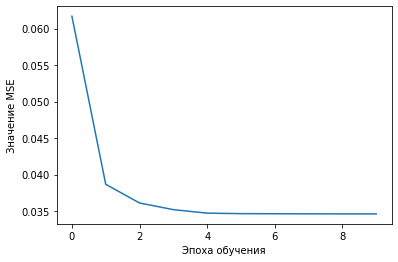

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(Pre_history.history['loss'],
         label='Значение среднекватратичной ошибки в ходе обучения')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение MSE')

# Выводим легенду
#plt.legend(loc='upper right')
plt.show()

## 5.2 Финальная версия нейронной сети

Функция создания автокодировщика

In [ ]:
def Autoencoder():
  dataSize = X_train.shape[1]           # берём размеры X_train по второй оси (37)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть

  x1 = Dense(300, activation='linear')(dataInput) # пропускаем через полносвязный слой размером 300
  x2 = Dropout(0.025)(x1)                          # добавляем слой Dropout, очень помогает от переобучения
  x3 = Dense(dataSize, activation='relu')(x2)     # и через полносвязный слой размером 37


  autoencoder = Model(inputs=dataInput, outputs=x3) # собираем модель

  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель, с выбором оптимайзера и среднеквадратичной ошибки

  return autoencoder

Создание модели

In [ ]:
model = Autoencoder()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 37)]              0         
                                                                 
 dense_2 (Dense)             (None, 300)               11400     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 37)                11137     
                                                                 
Total params: 22,537
Trainable params: 22,537
Non-trainable params: 0
_________________________________________________________________


# 6 Обучение нейронной сети

In [ ]:
history = model.fit(X_train, X_train,
                    epochs=300,
                    batch_size=128)

Epoch 1/300
619/619 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 2/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 3/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 4/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 5/300
619/619 [==============================] - 1s 2ms/step - loss: 5.0188e-04
Epoch 6/300
619/619 [==============================] - 1s 2ms/step - loss: 4.7752e-04
Epoch 7/300
619/619 [==============================] - 1s 2ms/step - loss: 4.6043e-04
Epoch 8/300
619/619 [==============================] - 1s 2ms/step - loss: 4.5055e-04
Epoch 9/300
619/619 [==============================] - 1s 2ms/step - loss: 4.4354e-04
Epoch 10/300
619/619 [==============================] - 1s 2ms/step - loss: 4.3750e-04
Epoch 11/300
619/619 [==============================] - 1s 2ms/step - loss: 4.3317e-04
Epoch 12/300
619/619 [==============================] - 1s 2ms/step 

Визуализация процесса обучения нейронной сети

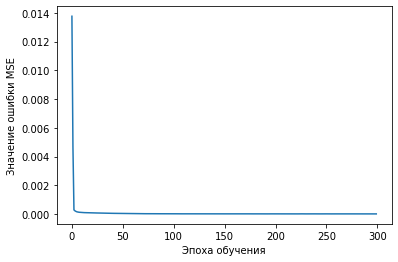

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['loss'],
         label='Значение среднекватратичной ошибки в ходе обучения')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки MSE')

# Выводим легенду
#plt.legend(loc='upper right')
plt.show()

# 7 Проверка работы нейронной сети

In [ ]:
predictions = model.predict(X_test)                      # делаем предсказание по X_test
mse = np.mean(np.power(X_test - predictions, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test
mse_normal = mse[y_test == 0]                     # среднеквадратичная ошибка на нормальных действиях
mse_frauds = mse[y_test == 1]                     # среднеквадратичная ошибка на аномальных действиях
print("Минимальная ошибка нормальных действий:", round(min(mse_normal),4))    # минимальная среднеквадратичная ошибка нормальных действий
print("Максимальная ошибка нормальных действий:", round(max(mse_normal),4))   # максимальная среднеквадратичная ошибка нормальных действий
print("Средняя ошибка нормальных действий:", round(sum(mse_normal) / len(mse_normal),4))    # средняя среднеквадратичная ошибка нормальных действий
print("=================================")
print("Минимальная ошибка аномальных действий:", round(min(mse_frauds),4))   # минимальная среднеквадратичная ошибка анормальных действий
print("Максимальная ошибка аномальных действий:", round(max(mse_frauds),4))  # максимальная среднеквадратичная ошибка анормальных действий
print("Средняя ошибка аномальных действий:", round(sum(mse_frauds) / len(mse_frauds),4)) # средняя среднеквадратичная ошибка анормальных действий

650/650 [==============================] - 1s 1ms/step
Минимальная ошибка нормальных действий: 0.0
Максимальная ошибка нормальных действий: 0.0005
Средняя ошибка нормальных действий: 0.0
Минимальная ошибка аномальных действий: 0.0
Максимальная ошибка аномальных действий: 0.0003
Средняя ошибка аномальных действий: 0.0


# 8 Результаты

С учётом возможных погрешностей полученных результатов, эксперименты показали:

1) точность работы нейронной сети стабильно и значительно повышается при:
-	двукратном увеличении обучающей выборки (изначально работа проводилась на выборке, состоящей из 50 000 векторов);
-	использовании пары из слоёв Dense + Dropout;
-	увеличении количества нейронов в скрытом слое примерно до 300;
-	увеличении количества эпох обучения.

2) точность работы нейронной сети стабильно и незначительно повышается при совместном использовании в качестве функций активации linear и relu;

3) не оказывает значительного влияния на точность работы нейронной сети:
-	изменение доли аномальных действий в выборке;
-	изменение значения batch.

Финальное значение ошибки MSE: 8.3024e-06.



Уточнённые результаты проведённых экспериментов представлены в разделе 6 Отчёта о дипломной работе.

# 9 Выводы

Поставленная цель (разработка прототипа нейронной сети, предназначенной для выявления аномалий в поведении пользователей) достигнута, а задачи решены.

Теоретическое и практическое значение дипломной работы заключается в следующем:
1. Формализовано поведение пользователя и доказана возможность выявления аномалий в поведении пользователя при помощи искусственной нейронной сети.
2. Разработана нейронная сеть, обеспечивающая:
-	оперативное выявление аномалий в поведении пользователей;
-	выполнение требований ФСТЭК России в части анализа зарегистрированных событий безопасности и реагирования на них (РСБ.5);
-	защиту от угроз, представленных банке  данных угроз ФСТЭК России, связанных с подменой доверенного пользователя (УБИ.128) и его действий путём обмана (УБИ.127).


Дальнейшую работу представляется целесообразным продолжать по следующим направлениям:
1. При работе со сгенерированной базой данных – добавление в базу данных сведений о месте расположения точки доступа с целью учёта часового пояса пользователей.
2. Замена сгенерированной базы данных на реальную. В качестве источника данных может быть использована программная платформа перехвата и анализа трафика Ethersensor  (разработка компании ООО «Микроолап Текнолоджис» ). Потребуются дополнительный парсинг и формирование другой нейронной сети.
3. Увеличение размера базы данных.
4. Отказ от метода OneHotEncoding при парсинге базы данных в пользу теории нечётких множеств, обеспечивающей получение нормализованных значений.
5. Совершенствование архитектуры нейронной сети (в т.ч. проверка эффективности работы вариационного автокодировщика).
6. Применение методов подбора гиперпараметров нейронной сети, основанных на генетических алгоритмах.
7. Разработка частного метода определения эффективности работы нейронной сети.
8. Решение задач, связанных с подготовкой нейронной сети к ввведению в опытную эксплуатацию.
